
## Data Preprocessing Overview

*by Grace*

In data science, preprocessing is a crucial step that ensures the quality and integrity of data before feeding it to a machine learning model. Clean and well-prepared data can lead to better model performance and more accurate insights. This document will walk you through the key steps I undertook in the preprocessing phase.

### 1. **Data Transformation**
- **Objective:** Convert data into a suitable format or structure for analysis. This may involve scaling, encoding categorical variables, or other transformations.
  
### 2. **Outlier Detection**
- **Objective:** Identify and address extreme values that can adversely affect the performance of a machine learning model.
- **Method:** Use the Interquartile Range (IQR) and box plots to visually identify outliers. This method is robust for data with non-Gaussian distributions.
- **Next Steps:** Upon detection, outliers can be removed or imputed, depending on the data context and the potential impact on the analysis.
  
### 3. **Imputation of Missing Values**
- **Objective:** Handle missing data to prevent potential bias or misrepresentation in the analysis.
- **Method:** Use the median of the feature to fill missing values. This approach assumes that the missingness is random and that the median is a good representation for the missing value.
  
### 4. **Correlation Analysis**
- **Objective:** Understand the relationships between different features and between features and the target outcome.
- **Methods:** 
  - **Between-feature Correlation:** Analyse how different features relate to one another. This helps in understanding potential multicollinearity and redundancy.
  - **Feature-and-outcome Correlation:** Analyse how individual features relate to the target variable. This provides insights into which features might be most predictive.
  
### 5. **Feature Selection**
- **Objective:** Select the most relevant features for the model to prevent overfitting and reduce computational costs.
- **Methods:** 
  - **Point-biserial Correlation:** Used for binary outcome variable and continuous predictor variables. It provides insights into the linear relationship between the feature and the outcome.
  - **Logistic Regression:** By assessing the significance of each feature's coefficient in predicting a binary outcome, we can gauge the importance of each feature in the context of the model.



In [82]:
import pandas as pd


In [83]:
clinic_df = pd.read_csv('../data/clinic_df.csv')
lab_df = pd.read_csv('../data/lab_df.csv')
dod = pd.read_csv('../data/dod.csv')

In [84]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,11164848,F,71,226763,HrApacheIIScore,2.0,NaN,2148-03-01
1,1,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
2,2,16665617,M,76,226763,HrApacheIIScore,2.0,NaN,2156-05-15
3,3,15274195,F,44,226763,HrApacheIIScore,2.0,NaN,2147-10-18
4,4,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
...,...,...,...,...,...,...,...,...,...
51706,51706,19343084,M,82,226253,SpO2 Desat Limit,88.0,%,2152-04-26
51707,51707,19557524,F,40,226253,SpO2 Desat Limit,88.0,%,NaN
51708,51708,19667252,F,91,226253,SpO2 Desat Limit,88.0,%,2171-09-27
51709,51709,19753816,F,61,226253,SpO2 Desat Limit,88.0,%,2192-12-27


In [85]:
lab_df


,Unnamed: 0,subject_id,gender,age,lab_label,lab_itemid,lab_val,lab_unit,dod
0,0,10049334,M,82,PT,51274,17.4,sec,2184-06-05
1,1,10137419,F,91,PT,51274,13.7,sec,NaN
2,2,10144145,M,55,PT,51274,11.0,sec,2115-04-03
3,3,10236326,M,68,PT,51274,13.4,sec,NaN
4,4,10272100,F,85,PT,51274,16.5,sec,NaN
...,...,...,...,...,...,...,...,...,...
64683,64683,16934035,M,64,"Albumin/Creatinine, Urine",51070,6.1,mg/g,NaN
64684,64684,17191559,F,44,"Albumin/Creatinine, Urine",51070,2365.0,mg/g,NaN
64685,64685,18713335,F,68,"Albumin/Creatinine, Urine",51070,33.3,mg/g,NaN
64686,64686,19259992,M,57,"Albumin/Creatinine, Urine",51070,NaN,mg/g,NaN


## 1. Data Transformation


In [86]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,11164848,F,71,226763,HrApacheIIScore,2.0,NaN,2148-03-01
1,1,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
2,2,16665617,M,76,226763,HrApacheIIScore,2.0,NaN,2156-05-15
3,3,15274195,F,44,226763,HrApacheIIScore,2.0,NaN,2147-10-18
4,4,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
...,...,...,...,...,...,...,...,...,...
51706,51706,19343084,M,82,226253,SpO2 Desat Limit,88.0,%,2152-04-26
51707,51707,19557524,F,40,226253,SpO2 Desat Limit,88.0,%,NaN
51708,51708,19667252,F,91,226253,SpO2 Desat Limit,88.0,%,2171-09-27
51709,51709,19753816,F,61,226253,SpO2 Desat Limit,88.0,%,2192-12-27


In [87]:
dod

,Unnamed: 0,subject_id,AKI_criterion1_patients,AKI_criterion2_patients,deceased_patients
0,24,12642263,0,1,0
1,29,12155939,0,1,0
2,49,17735780,0,1,0
3,118,13677167,0,1,0
4,126,11259141,0,1,0
...,...,...,...,...,...
9804,30267,12118394,1,1,0
9805,30268,18392647,1,1,0
9806,30269,12459376,1,1,0
9807,30270,14262251,1,0,1


In [88]:

df = clinic_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='clinic_label', values='clinic_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_clinic = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')
df_merged_clinic = pd.merge(dod[['subject_id', 'deceased_patients']].drop_duplicates(), df_merged_clinic, on='subject_id').rename(columns={'deceased_patients': 'dod'})
df_merged_clinic['gender'] = df_merged_clinic['gender'].replace({'M': 1, 'F': 0})
df_merged_clinic

,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,12642263,0,1,73,48.0,101.0,84.0,110.0,NaN,20.0,85.0,NaN
1,12155939,0,0,24,NaN,NaN,59.0,120.0,NaN,16.0,85.0,NaN
2,17735780,0,0,54,48.0,130.0,59.0,125.0,NaN,24.0,88.0,NaN
3,13677167,0,1,84,NaN,NaN,89.0,130.0,NaN,21.0,85.0,NaN
4,11259141,0,0,59,70.0,91.0,99.0,130.0,NaN,21.0,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,62.0,103.0,89.0,120.0,NaN,20.0,85.0,36.4
9805,18392647,0,1,74,NaN,NaN,107.0,135.0,NaN,22.0,85.0,NaN
9806,12459376,0,1,58,NaN,NaN,78.0,120.0,NaN,10.0,88.0,NaN
9807,14262251,1,1,84,NaN,NaN,101.0,120.0,NaN,25.0,85.0,NaN


In [89]:
df = lab_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='lab_label', values='lab_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_lab = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')
df_merged_lab = pd.merge(dod[['subject_id', 'deceased_patients']].drop_duplicates(), df_merged_lab, on='subject_id').rename(columns={'deceased_patients': 'dod'})
df_merged_lab['gender'] = df_merged_lab['gender'].replace({'M': 1, 'F': 0})
df_merged_lab

,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,12642263,0,1,73,3.6,NaN,1.2,9.4,3.2,13.8,138.0,16.0
1,12155939,0,0,24,4.1,NaN,0.5,NaN,1.2,15.7,143.0,6.0
2,17735780,0,0,54,4.1,NaN,0.4,NaN,1.0,14.4,142.0,22.0
3,13677167,0,1,84,NaN,NaN,1.1,NaN,1.6,18.7,144.0,17.0
4,11259141,0,0,59,3.6,NaN,0.6,NaN,1.7,12.4,153.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,3.3,NaN,3.6,NaN,1.5,13.1,138.0,23.0
9805,18392647,0,1,74,NaN,NaN,0.6,NaN,1.2,13.6,138.0,6.0
9806,12459376,0,1,58,4.1,NaN,0.6,NaN,0.9,9.3,141.0,8.0
9807,14262251,1,1,84,4.0,NaN,3.4,12.2,1.1,17.9,141.0,88.0


In [90]:
df_merged_lab[df_merged_lab['dod']==1]
# 8 lab features 

,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
5,17982140,1,1,71,3.9,NaN,1.2,NaN,1.3,15.2,136.0,53.0
28,19803888,1,0,62,4.0,NaN,1.4,12.3,1.2,13.1,134.0,45.0
31,18304672,1,0,73,2.1,NaN,0.4,10.2,1.1,12.4,134.0,11.0
43,19039643,1,0,79,2.1,NaN,0.2,NaN,1.3,11.4,134.0,16.0
50,17790156,1,0,66,2.7,NaN,0.7,NaN,2.1,38.4,143.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9770,12492737,1,0,76,2.4,NaN,1.4,9.1,1.1,14.1,140.0,40.0
9771,11167834,1,0,91,3.3,NaN,2.1,NaN,5.2,14.3,141.0,77.0
9791,13219803,1,1,74,3.5,NaN,1.1,NaN,1.1,12.6,138.0,25.0
9796,16268687,1,1,85,3.5,NaN,2.6,7.0,1.7,17.1,139.0,27.0


In [91]:
df_merged_clinic[df_merged_clinic['dod']==1]
# 8 clinic features 

,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
5,17982140,1,1,71,NaN,NaN,128.0,150.0,NaN,26.0,85.0,NaN
28,19803888,1,0,62,NaN,NaN,94.0,120.0,NaN,12.0,85.0,NaN
31,18304672,1,0,73,NaN,NaN,103.0,130.0,NaN,26.0,85.0,NaN
43,19039643,1,0,79,NaN,NaN,91.0,120.0,NaN,18.0,88.0,NaN
50,17790156,1,0,66,54.0,117.0,90.0,130.0,NaN,24.0,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9770,12492737,1,0,76,52.0,104.0,101.0,135.0,NaN,18.0,85.0,37.3
9771,11167834,1,0,91,NaN,NaN,102.0,130.0,NaN,22.0,85.0,NaN
9791,13219803,1,1,74,51.0,88.0,101.0,130.0,NaN,11.0,85.0,NaN
9796,16268687,1,1,85,41.0,136.0,80.0,100.0,NaN,14.0,85.0,36.0


In [92]:
df_merged_clinic[df_merged_clinic['dod']==0]


,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,12642263,0,1,73,48.0,101.0,84.0,110.0,NaN,20.0,85.0,NaN
1,12155939,0,0,24,NaN,NaN,59.0,120.0,NaN,16.0,85.0,NaN
2,17735780,0,0,54,48.0,130.0,59.0,125.0,NaN,24.0,88.0,NaN
3,13677167,0,1,84,NaN,NaN,89.0,130.0,NaN,21.0,85.0,NaN
4,11259141,0,0,59,70.0,91.0,99.0,130.0,NaN,21.0,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9803,14259706,0,1,80,NaN,NaN,80.0,120.0,NaN,25.0,85.0,NaN
9804,12118394,0,1,61,62.0,103.0,89.0,120.0,NaN,20.0,85.0,36.4
9805,18392647,0,1,74,NaN,NaN,107.0,135.0,NaN,22.0,85.0,NaN
9806,12459376,0,1,58,NaN,NaN,78.0,120.0,NaN,10.0,88.0,NaN


## 2. EDA 
exploratory data analysis

### summary

In [93]:
print("Clinic Data:")
df_merged_clinic.describe()

Clinic Data:


,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
count,9.809000e+03,9809.000000,9809.000000,9809.000000,5363.000000,5362.000000,9808.000000,9799.000000,6.000000,9806.000000,9774.000000,1793.000000
mean,1.502895e+07,0.169130,0.595066,66.248649,57.869476,116.676240,85.215029,135.292683,1.666667,19.725984,173.681297,36.828634
std,2.905536e+06,0.374886,0.490904,15.492567,13.808696,23.172379,18.488835,1111.479626,0.816497,6.037523,8651.790250,4.078855
min,1.000201e+07,0.000000,0.000000,18.000000,13.000000,0.000000,0.000000,10.000000,0.000000,0.000000,35.000000,0.000000
25%,1.251029e+07,0.000000,0.000000,57.000000,49.000000,102.000000,72.000000,120.000000,2.000000,16.000000,85.000000,36.100000
50%,1.507661e+07,0.000000,1.000000,68.000000,56.000000,114.000000,84.000000,120.000000,2.000000,19.000000,85.000000,36.800000
75%,1.757821e+07,0.000000,1.000000,78.000000,65.000000,129.000000,96.000000,130.000000,2.000000,23.000000,88.000000,37.400000
max,1.999983e+07,1.000000,1.000000,91.000000,328.000000,332.000000,169.000000,110120.000000,2.000000,69.000000,855432.000000,99.900000


In [94]:

print("\nLab Data:")
df_merged_lab.describe()


Lab Data:


,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
count,9.809000e+03,9809.000000,9809.000000,9809.000000,8895.000000,1214.000000,9804.000000,5522.000000,9689.000000,9688.000000,9808.000000,9805.000000
mean,1.502895e+07,0.169130,0.595066,66.248649,3.452726,558.556590,1.785873,10.316896,1.462243,16.084527,138.392435,31.341968
std,2.905536e+06,0.374886,0.490904,15.492567,0.754777,1708.402419,1.777137,2.331904,0.766708,8.247772,4.955111,23.545074
min,1.000201e+07,0.000000,0.000000,18.000000,0.900000,1.300000,0.000000,0.000000,0.500000,7.500000,103.000000,1.000000
25%,1.251029e+07,0.000000,0.000000,57.000000,2.900000,12.800000,0.900000,8.600000,1.100000,12.200000,136.000000,16.000000
50%,1.507661e+07,0.000000,1.000000,68.000000,3.500000,52.250000,1.200000,10.200000,1.200000,13.600000,139.000000,24.000000
75%,1.757821e+07,0.000000,1.000000,78.000000,4.000000,290.125000,1.900000,11.800000,1.500000,16.400000,141.000000,39.000000
max,1.999983e+07,1.000000,1.000000,91.000000,5.400000,25235.000000,21.400000,20.500000,13.600000,150.000000,175.000000,221.000000


### missing value

In [95]:
df_merged_clinic

,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,12642263,0,1,73,48.0,101.0,84.0,110.0,NaN,20.0,85.0,NaN
1,12155939,0,0,24,NaN,NaN,59.0,120.0,NaN,16.0,85.0,NaN
2,17735780,0,0,54,48.0,130.0,59.0,125.0,NaN,24.0,88.0,NaN
3,13677167,0,1,84,NaN,NaN,89.0,130.0,NaN,21.0,85.0,NaN
4,11259141,0,0,59,70.0,91.0,99.0,130.0,NaN,21.0,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,62.0,103.0,89.0,120.0,NaN,20.0,85.0,36.4
9805,18392647,0,1,74,NaN,NaN,107.0,135.0,NaN,22.0,85.0,NaN
9806,12459376,0,1,58,NaN,NaN,78.0,120.0,NaN,10.0,88.0,NaN
9807,14262251,1,1,84,NaN,NaN,101.0,120.0,NaN,25.0,85.0,NaN


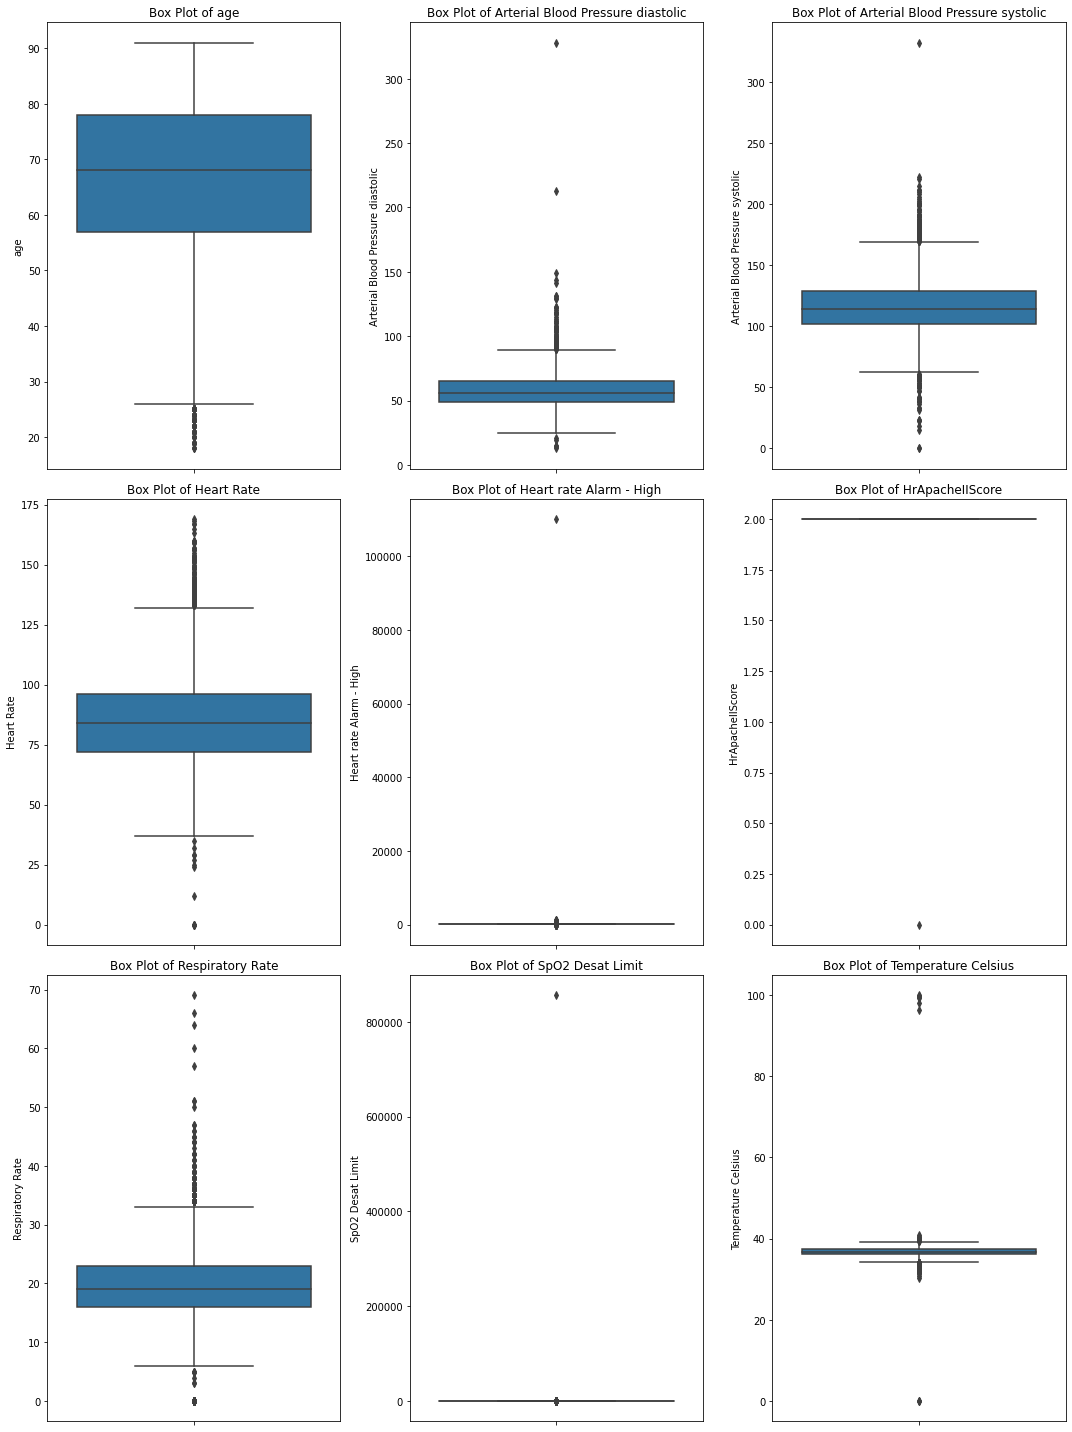

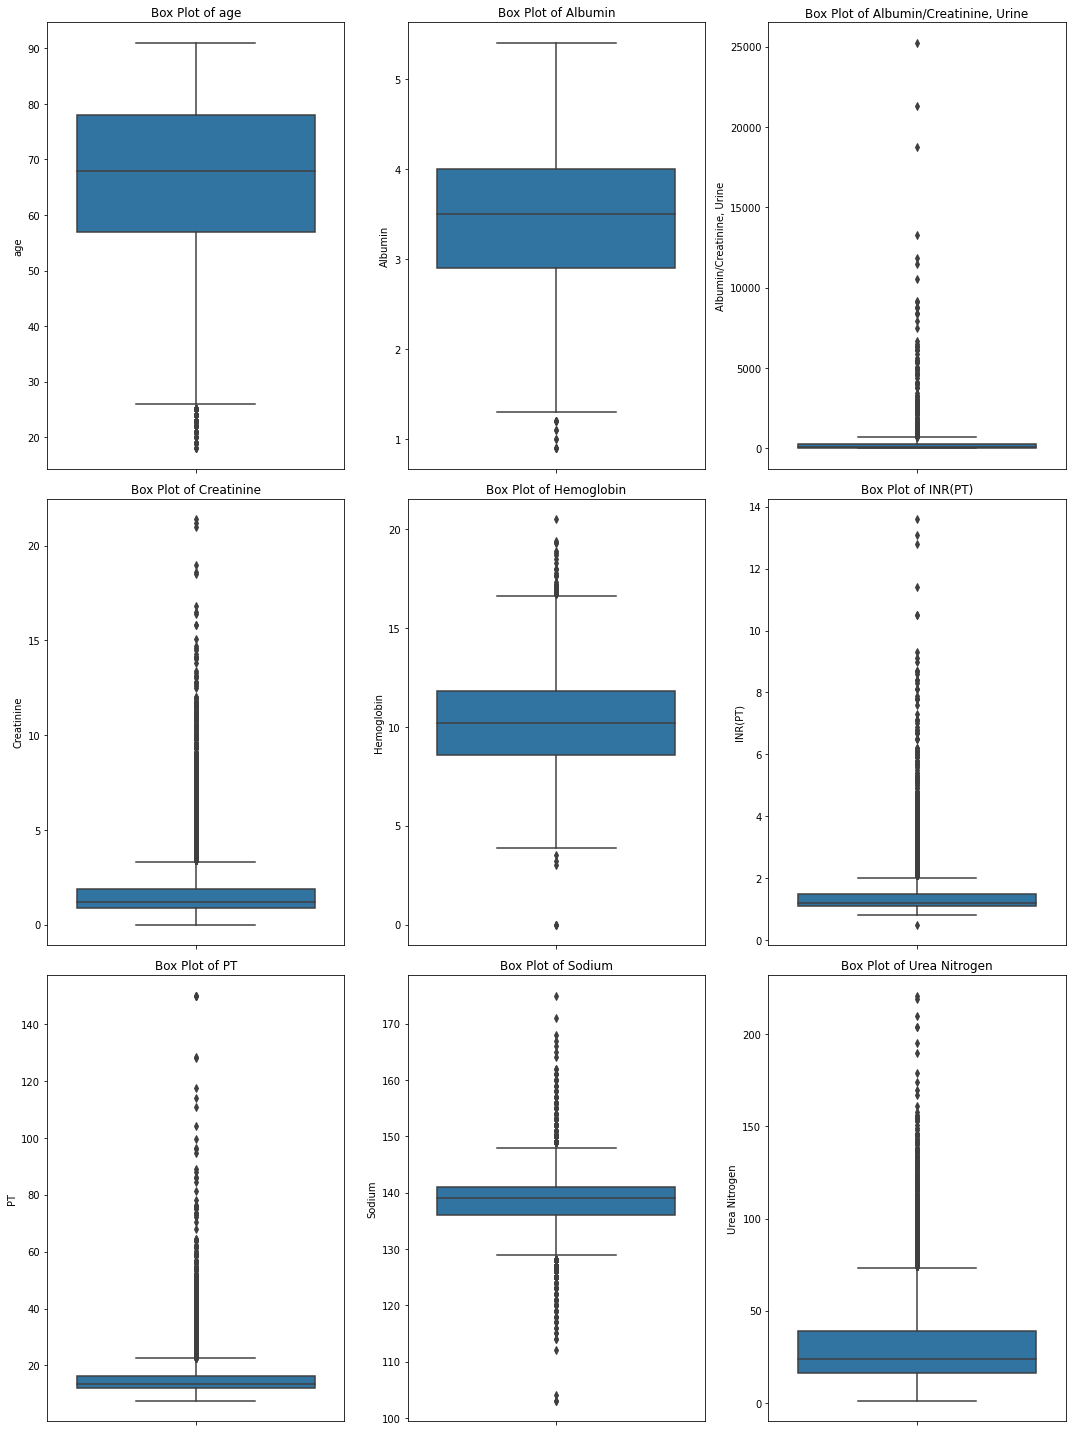

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Clinic Data
num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic.columns[3:]):
    sns.boxplot(y=df_merged_clinic[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Similarly for Lab Data
num_plots = len(df_merged_lab.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab.columns[3:]):
    sns.boxplot(y=df_merged_lab[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


From the above box plots, we can see that there are many outliers. Hence, we will replace outliers with NA. We are not removing outliers because if will result in lack of data (around 3000 will be removed, and only 3000 left for clinic, and all data will be removed for lab) and inconsistency for lab data and clinic data. 

### outlier deletion with IQR

In [97]:
df_merged_lab


,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,12642263,0,1,73,3.6,NaN,1.2,9.4,3.2,13.8,138.0,16.0
1,12155939,0,0,24,4.1,NaN,0.5,NaN,1.2,15.7,143.0,6.0
2,17735780,0,0,54,4.1,NaN,0.4,NaN,1.0,14.4,142.0,22.0
3,13677167,0,1,84,NaN,NaN,1.1,NaN,1.6,18.7,144.0,17.0
4,11259141,0,0,59,3.6,NaN,0.6,NaN,1.7,12.4,153.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,3.3,NaN,3.6,NaN,1.5,13.1,138.0,23.0
9805,18392647,0,1,74,NaN,NaN,0.6,NaN,1.2,13.6,138.0,6.0
9806,12459376,0,1,58,4.1,NaN,0.6,NaN,0.9,9.3,141.0,8.0
9807,14262251,1,1,84,4.0,NaN,3.4,12.2,1.1,17.9,141.0,88.0


In [98]:
def remove_outliers_columnwise(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only replace values outside bounds with NaN for now
    for col in df.columns:
        df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), np.nan)

    return df

# Extract the lab item columns
lab_items = df_merged_lab.iloc[:, 3:].copy()
clinic_items = df_merged_clinic.iloc[:, 3:].copy()


# Remove outliers column-wise
lab_items_clean = remove_outliers_columnwise(lab_items)
clinic_items_clean = remove_outliers_columnwise(clinic_items)


# Merge back the cleaned lab items with the original demographic columns
df_merged_lab_clean = pd.concat([df_merged_lab.iloc[:, :3], lab_items_clean], axis=1)
df_merged_clinic_clean = pd.concat([df_merged_clinic.iloc[:, :3], lab_items_clean], axis=1)


In [99]:
df_merged_lab_clean

,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,12642263,0,1,73.0,3.6,NaN,1.2,9.4,NaN,13.8,138.0,16.0
1,12155939,0,0,NaN,4.1,NaN,0.5,NaN,1.2,15.7,143.0,6.0
2,17735780,0,0,54.0,4.1,NaN,0.4,NaN,1.0,14.4,142.0,22.0
3,13677167,0,1,84.0,NaN,NaN,1.1,NaN,1.6,18.7,144.0,17.0
4,11259141,0,0,59.0,3.6,NaN,0.6,NaN,1.7,12.4,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61.0,3.3,NaN,NaN,NaN,1.5,13.1,138.0,23.0
9805,18392647,0,1,74.0,NaN,NaN,0.6,NaN,1.2,13.6,138.0,6.0
9806,12459376,0,1,58.0,4.1,NaN,0.6,NaN,0.9,9.3,141.0,8.0
9807,14262251,1,1,84.0,4.0,NaN,NaN,12.2,1.1,17.9,141.0,NaN


In [100]:
df_merged_clinic_clean

,subject_id,dod,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,12642263,0,1,73.0,3.6,NaN,1.2,9.4,NaN,13.8,138.0,16.0
1,12155939,0,0,NaN,4.1,NaN,0.5,NaN,1.2,15.7,143.0,6.0
2,17735780,0,0,54.0,4.1,NaN,0.4,NaN,1.0,14.4,142.0,22.0
3,13677167,0,1,84.0,NaN,NaN,1.1,NaN,1.6,18.7,144.0,17.0
4,11259141,0,0,59.0,3.6,NaN,0.6,NaN,1.7,12.4,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61.0,3.3,NaN,NaN,NaN,1.5,13.1,138.0,23.0
9805,18392647,0,1,74.0,NaN,NaN,0.6,NaN,1.2,13.6,138.0,6.0
9806,12459376,0,1,58.0,4.1,NaN,0.6,NaN,0.9,9.3,141.0,8.0
9807,14262251,1,1,84.0,4.0,NaN,NaN,12.2,1.1,17.9,141.0,NaN


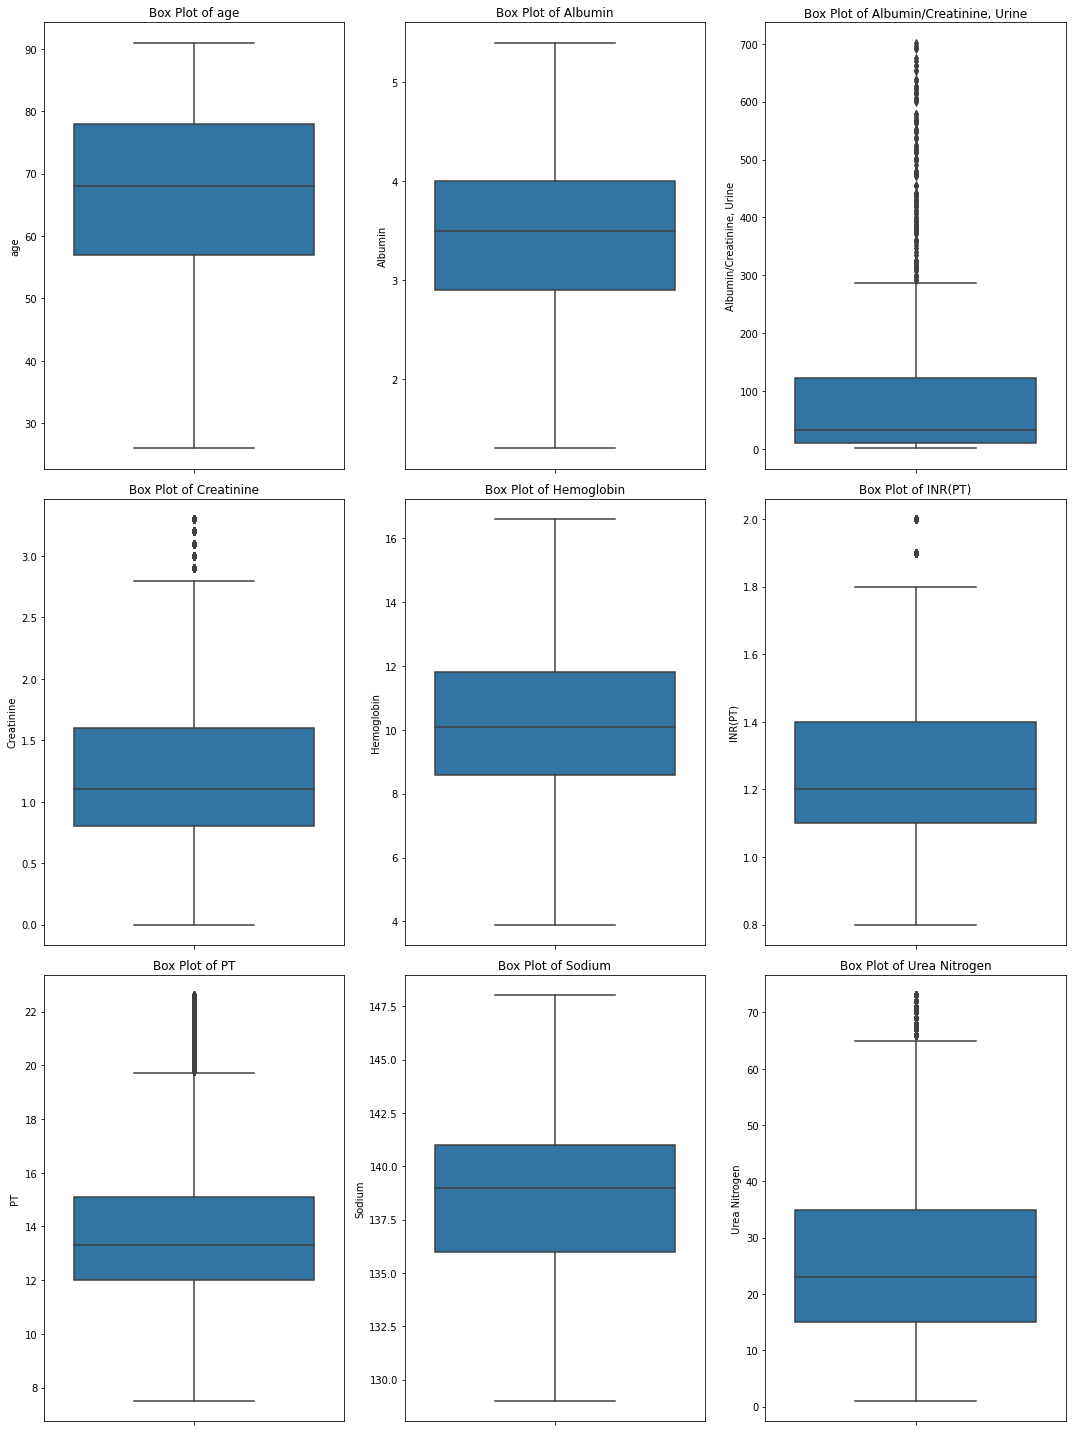

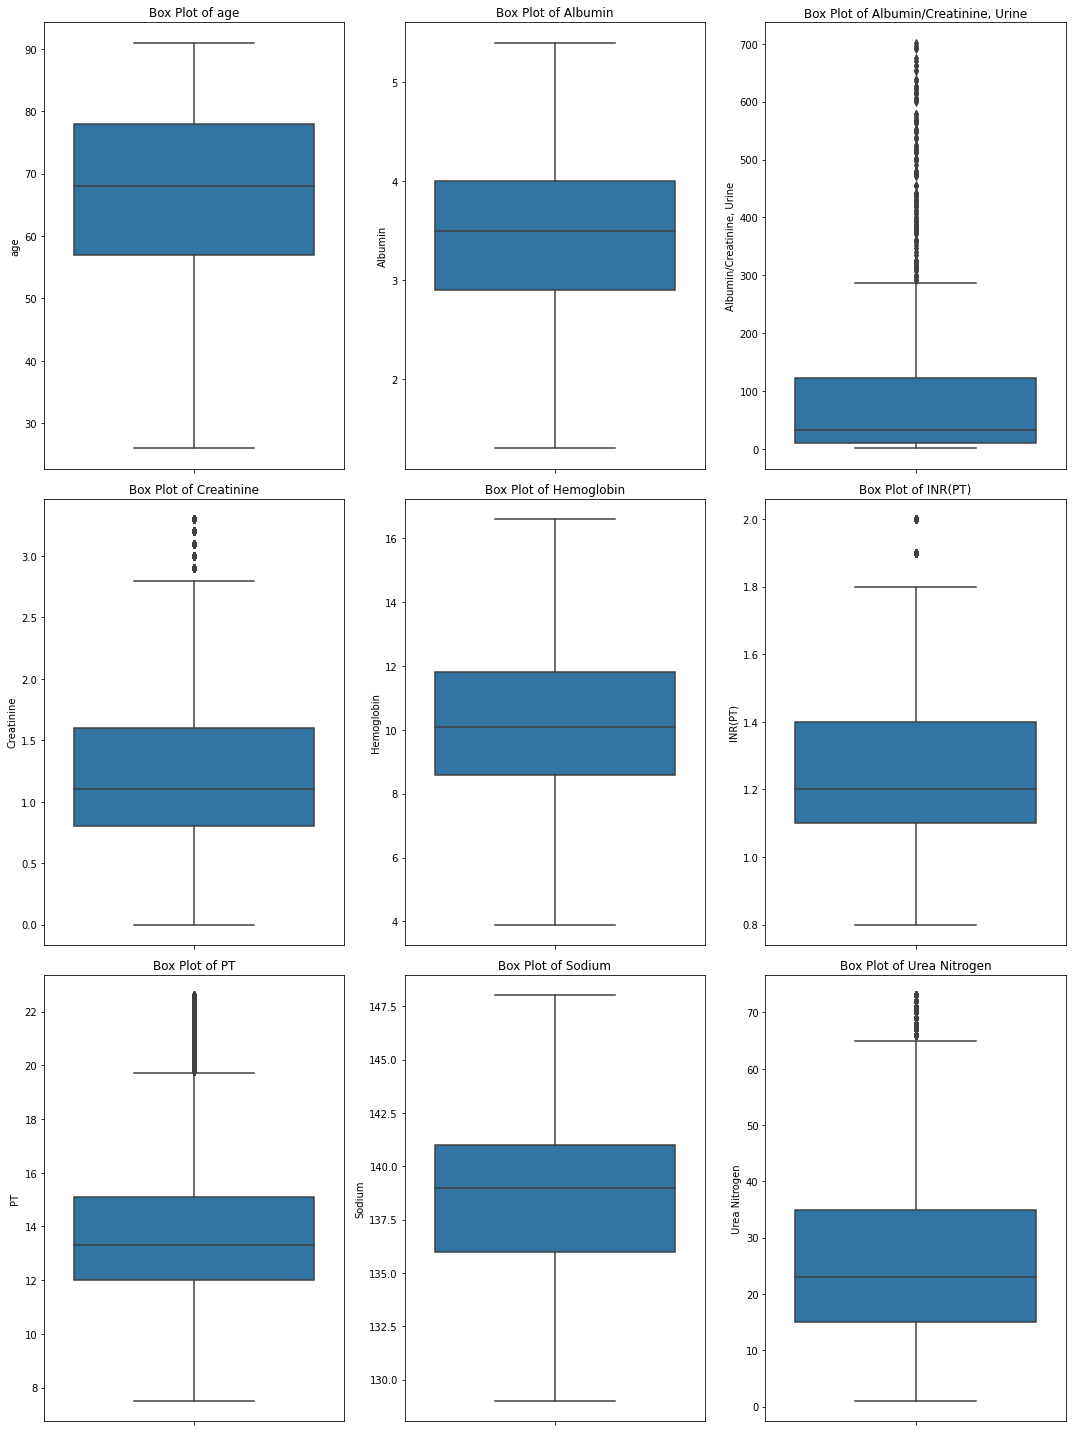

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Box Plots for Cleaned Clinic Data
num_plots = len(df_merged_clinic_clean.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic_clean.columns[3:]):
    sns.boxplot(y=df_merged_clinic_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Box Plots for Cleaned Lab Data
num_plots = len(df_merged_lab_clean.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab_clean.columns[3:]):
    sns.boxplot(y=df_merged_lab_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [102]:
print("Missing values in Clinic Data:")
print(df_merged_clinic.isnull().sum())

Missing values in Clinic Data:
subject_id                              0
dod                                     0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4446
Arterial Blood Pressure systolic     4447
Heart Rate                              1
Heart rate Alarm - High                10
HrApacheIIScore                      9803
Respiratory Rate                        3
SpO2 Desat Limit                       35
Temperature Celsius                  8016
dtype: int64


In [103]:
df_merged_clinic.columns

Index(['subject_id', 'dod', 'gender', 'age',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic',
       'Heart Rate', 'Heart rate Alarm - High', 'HrApacheIIScore',
       'Respiratory Rate', 'SpO2 Desat Limit', 'Temperature Celsius'],
      dtype='object')

In [104]:
# drop HrApacheIIScore and imupte with mean for Heart rate Alarm - High, and Respiratory Rate
if 'HrApacheIIScore' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['HrApacheIIScore'], inplace=True)
# Impute missing values in "Heart rate Alarm - High" with its mean
df_merged_clinic['Heart rate Alarm - High'].fillna(df_merged_clinic['Heart rate Alarm - High'].median(), inplace=True)
# Impute missing values in "Respiratory Rate" with its mean
df_merged_clinic['Respiratory Rate'].fillna(df_merged_clinic['Respiratory Rate'].median(), inplace=True)


In [105]:
df_merged_clinic

,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,12642263,0,1,73,48.0,101.0,84.0,110.0,20.0,85.0,NaN
1,12155939,0,0,24,NaN,NaN,59.0,120.0,16.0,85.0,NaN
2,17735780,0,0,54,48.0,130.0,59.0,125.0,24.0,88.0,NaN
3,13677167,0,1,84,NaN,NaN,89.0,130.0,21.0,85.0,NaN
4,11259141,0,0,59,70.0,91.0,99.0,130.0,21.0,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,62.0,103.0,89.0,120.0,20.0,85.0,36.4
9805,18392647,0,1,74,NaN,NaN,107.0,135.0,22.0,85.0,NaN
9806,12459376,0,1,58,NaN,NaN,78.0,120.0,10.0,88.0,NaN
9807,14262251,1,1,84,NaN,NaN,101.0,120.0,25.0,85.0,NaN


In [106]:
df_merged_clinic.isnull().sum()

subject_id                              0
dod                                     0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4446
Arterial Blood Pressure systolic     4447
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       35
Temperature Celsius                  8016
dtype: int64

In [107]:
print("\nMissing values in Lab Data:")
print(df_merged_lab.isnull().sum())


Missing values in Lab Data:
subject_id                      0
dod                             0
gender                          0
age                             0
Albumin                       914
Albumin/Creatinine, Urine    8595
Creatinine                      5
Hemoglobin                   4287
INR(PT)                       120
PT                            121
Sodium                          1
Urea Nitrogen                   4
dtype: int64


Drop white blood cells as 6180/6182 are missing, and Temperature(3007/6182) are missing

In [108]:
df_merged_clinic.isnull().sum()

subject_id                              0
dod                                     0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4446
Arterial Blood Pressure systolic     4447
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       35
Temperature Celsius                  8016
dtype: int64

In [109]:
# Calculate the threshold for 60% non-missing values
thresh = df_merged_clinic.shape[0] * 0.4 

# Drop columns with more than 60% missing values
df_merged_clinic.dropna(axis=1, thresh=thresh, inplace=True)
df_merged_clinic.isnull().sum()

subject_id                              0
dod                                     0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4446
Arterial Blood Pressure systolic     4447
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       35
dtype: int64

In [110]:
# Calculate the threshold for 60% non-missing values
thresh = df_merged_lab.shape[0] * 0.4 

# Drop columns with more than 60% missing values
df_merged_lab.dropna(axis=1, thresh=thresh, inplace=True)
df_merged_lab.isnull().sum()

subject_id          0
dod                 0
gender              0
age                 0
Albumin           914
Creatinine          5
Hemoglobin       4287
INR(PT)           120
PT                121
Sodium              1
Urea Nitrogen       4
dtype: int64

For other columns, fill in with mean

In [111]:
def columns_with_missing_values(df):
    """Return a list of columns with missing values in the dataframe."""
    return [col for col in df.columns if df[col].isnull().sum() > 0]

# For df_merged_lab
cols_to_fill_lab = columns_with_missing_values(df_merged_lab)

# For df_merged_clinic
cols_to_fill_clinic = columns_with_missing_values(df_merged_clinic)

# Function to fill missing values with median
def fill_missing_with_median(df, cols_to_fill):
    for col in cols_to_fill:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Apply function to both dataframes
fill_missing_with_median(df_merged_lab, cols_to_fill_lab)
fill_missing_with_median(df_merged_clinic, cols_to_fill_clinic)



In [112]:


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [113]:
print(df_merged_lab.isnull().sum())


subject_id       0
dod              0
gender           0
age              0
Albumin          0
Creatinine       0
Hemoglobin       0
INR(PT)          0
PT               0
Sodium           0
Urea Nitrogen    0
dtype: int64


### Up to here we've complete the following:
1. data transformation
2. replace outliers by NA using IQR
3. imputation with NA: 
    1. if too many missing (> 50%), remove the whole column
    2. filling with median (as data are continuos)

### In the following section, we will:
1. data distribution visualisation
2. merge lab data with clinic data
3. further EDA
4. risk factor analysis, select significant features for ml modeling

###  Data Distribution Visualisation

In [114]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_distributions(df, title_prefix):
#     """Plot distributions for each column in a dataframe."""
#     num_cols = df.shape[1]
#     fig, axes = plt.subplots(nrows=num_cols, figsize=(7, 4*num_cols))
    
#     for col, ax in zip(df.columns, axes):
#         sns.histplot(df[col], kde=True, ax=ax)
#         ax.set_title(f'Distribution of {title_prefix} {col}')
    
#     plt.tight_layout()
#     plt.show()

# # Visualize distributions for clinic data
# plot_distributions(df_merged_clinic, 'Clinic Data -')

# # Visualize distributions for lab data
# plot_distributions(df_merged_lab, 'Lab Data -')

In [115]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function to dynamically determine rows and cols for subplots
# def determine_grid(num_plots):
#     cols = int(np.ceil(np.sqrt(num_plots)))
#     rows = int(np.ceil(num_plots / cols))
#     return rows, cols

# # Clinic Data
# num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
# rows, cols = determine_grid(num_plots)

# fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
# axes = axes.ravel()  # Flattening to easily iterate

# for index, column in enumerate(df_merged_clinic.columns[3:]):
#     sns.histplot(df_merged_clinic[column], kde=True, ax=axes[index])
#     axes[index].set_title(f'Distribution of {column}')

# # Remove any unused subplots
# for idx in range(num_plots, rows*cols):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()

# # Similarly for Lab Data
# num_plots = len(df_merged_lab.columns) - 3
# rows, cols = determine_grid(num_plots)

# fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
# axes = axes.ravel()

# for index, column in enumerate(df_merged_lab.columns[3:]):
#     sns.histplot(df_merged_lab[column], kde=True, ax=axes[index])
#     axes[index].set_title(f'Distribution of {column}')

# for idx in range(num_plots, rows*cols):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()


### Comment:
As we can see, after our manipulation with the data (outlier removal, missing value imputation, etc.) most of the data demonstrate Gaussian distribution which indicates that are data is appropriate for further analysis.

### Correlation analysis (within features)

In [116]:
df_merged_clinic

,subject_id,dod,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit
0,12642263,0,1,73,48.0,101.0,84.0,110.0,20.0,85.0
1,12155939,0,0,24,56.0,114.0,59.0,120.0,16.0,85.0
2,17735780,0,0,54,48.0,130.0,59.0,125.0,24.0,88.0
3,13677167,0,1,84,56.0,114.0,89.0,130.0,21.0,85.0
4,11259141,0,0,59,70.0,91.0,99.0,130.0,21.0,88.0
...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,62.0,103.0,89.0,120.0,20.0,85.0
9805,18392647,0,1,74,56.0,114.0,107.0,135.0,22.0,85.0
9806,12459376,0,1,58,56.0,114.0,78.0,120.0,10.0,88.0
9807,14262251,1,1,84,56.0,114.0,101.0,120.0,25.0,85.0


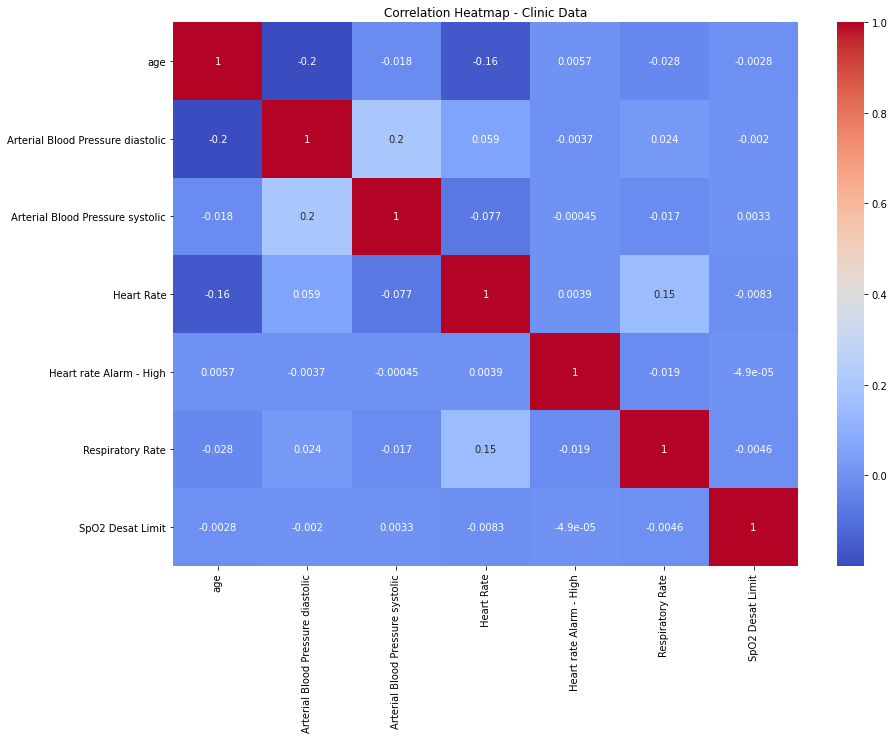

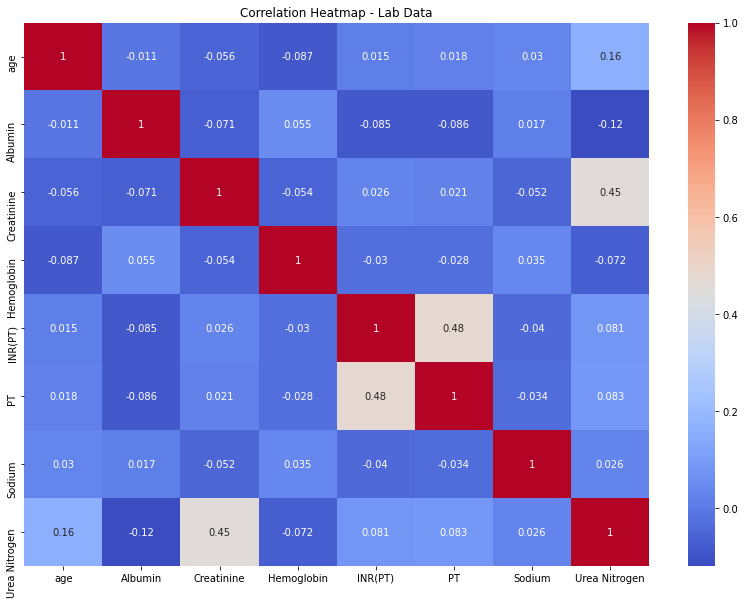

In [117]:
# Correlation heatmap for Clinic Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_clinic.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Clinic Data")
plt.show()

# Correlation heatmap for Lab Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_lab.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Lab Data")
plt.show()


Conclusion: Little correlation between features

### Merge lab, clinic, and demographic data
### Calculate VIF for each predictor variable


In [118]:
df_merged_clinic.iloc[:, 3:]

,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit
0,73,48.0,101.0,84.0,110.0,20.0,85.0
1,24,56.0,114.0,59.0,120.0,16.0,85.0
2,54,48.0,130.0,59.0,125.0,24.0,88.0
3,84,56.0,114.0,89.0,130.0,21.0,85.0
4,59,70.0,91.0,99.0,130.0,21.0,88.0
...,...,...,...,...,...,...,...
9804,61,62.0,103.0,89.0,120.0,20.0,85.0
9805,74,56.0,114.0,107.0,135.0,22.0,85.0
9806,58,56.0,114.0,78.0,120.0,10.0,88.0
9807,84,56.0,114.0,101.0,120.0,25.0,85.0


In [119]:
df_comorbidity = pd.read_csv('../data/comorbidity.csv')
#df_merged_clinic.drop(columns=['gender', 'age'])
if 'gender' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['gender', 'age', 'dod'], inplace=True)
df_lab_clinic = df_merged_lab.merge(df_merged_clinic, on="subject_id")
df_total = df_lab_clinic.merge(df_comorbidity, on="subject_id")
if "Unnamed: 0" in df_total.columns:
    df_total = df_total.drop(columns="Unnamed: 0")

In [120]:
df_total_columns = list(df_total.columns)[:-1]  # exclude intercept
df_categorical = ['subject_id', 'gender', 'dod','diabetes', 'hypertension', 'chronic_kidney_disease','sepsis']

df_continuous = [col for col in df_total_columns if col not in df_categorical]

In [121]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df = df_total
# Add a constant to the model (intercept)
df["Intercept"] = 1

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

                             Variable         VIF
0                          subject_id    1.001525
1                                 dod    1.166898
2                              gender    1.040945
3                                 age    1.201653
4                             Albumin    1.118487
5                          Creatinine    1.429655
6                          Hemoglobin    1.040028
7                             INR(PT)    1.318554
8                                  PT    1.321138
9                              Sodium    1.020740
10                      Urea Nitrogen    1.416975
11  Arterial Blood Pressure diastolic    1.103016
12   Arterial Blood Pressure systolic    1.077244
13                         Heart Rate    1.100703
14            Heart rate Alarm - High    1.000806
15                   Respiratory Rate    1.045948
16                   SpO2 Desat Limit    1.001106
17                           diabetes    1.096086
18                       hypertension    1.203978


Interpreting VIF:

- A rule of thumb is that if VIF is above 5-10, then multicollinearity is high.
- VIF = 1 implies no multicollinearity.
- VIF between 1 and 5 implies moderate multicollinearity.

#### Comments:
In conclusion, based on the heat map and VIF values, multicollinearity doesn't appear to be a concern for our dataset. This is good news because it means that each variable brings its own unique information to the regression equation.

### Distinguish Continuous and Categorical Variables

### Correlation analysis (between features and mortality)
We will analyse correlation between features and mortality with following approach:
1. point-biserial correlation
2. logistic regression

based on the following criteria:

1. **Correlation Value (r)**:
    - It represents the strength and direction of the linear relationship between the feature and mortality.
    - A positive value suggests that as the feature value increases, the likelihood of mortality (`dod = 1`) also increases, and vice-versa.
    - A negative value suggests an inverse relationship: as the feature value increases, the likelihood of mortality decreases.
    - The magnitude of this correlation value (irrespective of its sign) tells about the strength of the relationship. Values closer to 1 or -1 represent stronger relationships.

2. **P-Value**:
    - It assesses the significance of the observed correlation. 
    - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. In other words, it suggests that the observed correlation is statistically significant and is unlikely due to random chance.
    - A large p-value (> 0.05) suggests that the observed correlation may be due to random chance.


#### Point-biserial correlation:

In [122]:
df_merged_clinic
# 6 clinic features

,subject_id,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit
0,12642263,48.0,101.0,84.0,110.0,20.0,85.0
1,12155939,56.0,114.0,59.0,120.0,16.0,85.0
2,17735780,48.0,130.0,59.0,125.0,24.0,88.0
3,13677167,56.0,114.0,89.0,130.0,21.0,85.0
4,11259141,70.0,91.0,99.0,130.0,21.0,88.0
...,...,...,...,...,...,...,...
9804,12118394,62.0,103.0,89.0,120.0,20.0,85.0
9805,18392647,56.0,114.0,107.0,135.0,22.0,85.0
9806,12459376,56.0,114.0,78.0,120.0,10.0,88.0
9807,14262251,56.0,114.0,101.0,120.0,25.0,85.0


In [123]:
df_merged_lab
# 7 lab features

,subject_id,dod,gender,age,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,12642263,0,1,73,3.6,1.2,9.4,3.2,13.8,138.0,16.0
1,12155939,0,0,24,4.1,0.5,10.2,1.2,15.7,143.0,6.0
2,17735780,0,0,54,4.1,0.4,10.2,1.0,14.4,142.0,22.0
3,13677167,0,1,84,3.5,1.1,10.2,1.6,18.7,144.0,17.0
4,11259141,0,0,59,3.6,0.6,10.2,1.7,12.4,153.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,3.3,3.6,10.2,1.5,13.1,138.0,23.0
9805,18392647,0,1,74,3.5,0.6,10.2,1.2,13.6,138.0,6.0
9806,12459376,0,1,58,4.1,0.6,10.2,0.9,9.3,141.0,8.0
9807,14262251,1,1,84,4.0,3.4,12.2,1.1,17.9,141.0,88.0


In [124]:
df_total

,subject_id,dod,gender,age,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,...,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit,diabetes,hypertension,chronic_kidney_disease,sepsis,Intercept
0,12642263,0,1,73,3.6,1.2,9.4,3.2,13.8,138.0,...,101.0,84.0,110.0,20.0,85.0,0,1,0,0,1
1,12155939,0,0,24,4.1,0.5,10.2,1.2,15.7,143.0,...,114.0,59.0,120.0,16.0,85.0,0,0,0,0,1
2,17735780,0,0,54,4.1,0.4,10.2,1.0,14.4,142.0,...,130.0,59.0,125.0,24.0,88.0,1,1,0,0,1
3,13677167,0,1,84,3.5,1.1,10.2,1.6,18.7,144.0,...,114.0,89.0,130.0,21.0,85.0,0,1,0,0,1
4,11259141,0,0,59,3.6,0.6,10.2,1.7,12.4,153.0,...,91.0,99.0,130.0,21.0,88.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,3.3,3.6,10.2,1.5,13.1,138.0,...,103.0,89.0,120.0,20.0,85.0,1,0,1,0,1
9805,18392647,0,1,74,3.5,0.6,10.2,1.2,13.6,138.0,...,114.0,107.0,135.0,22.0,85.0,0,1,0,0,1
9806,12459376,0,1,58,4.1,0.6,10.2,0.9,9.3,141.0,...,114.0,78.0,120.0,10.0,88.0,0,0,0,0,1
9807,14262251,1,1,84,4.0,3.4,12.2,1.1,17.9,141.0,...,114.0,101.0,120.0,25.0,85.0,0,1,1,0,1


In [125]:
df_continuous

['age',
 'Albumin',
 'Creatinine',
 'Hemoglobin',
 'INR(PT)',
 'PT',
 'Sodium',
 'Urea Nitrogen',
 'Arterial Blood Pressure diastolic',
 'Arterial Blood Pressure systolic',
 'Heart Rate',
 'Heart rate Alarm - High',
 'Respiratory Rate',
 'SpO2 Desat Limit']

In [126]:
from scipy.stats import pointbiserialr

# List of continuous features from the datasets
features = df_continuous

# Calculate and print point-biserial correlation for each feature with 'dod'
for feature in features:
    pbc = pointbiserialr(df_total[feature], df_total['dod'])
    print(f"Correlation with mortality for {feature}: {pbc.correlation:.3f} (p={pbc.pvalue:.3e})")


Correlation with mortality for age: 0.033 (p=1.223e-03)
Correlation with mortality for Albumin: -0.221 (p=1.791e-108)
Correlation with mortality for Creatinine: 0.058 (p=1.196e-08)
Correlation with mortality for Hemoglobin: -0.003 (p=8.023e-01)
Correlation with mortality for INR(PT): 0.173 (p=1.099e-66)
Correlation with mortality for PT: 0.177 (p=1.326e-69)
Correlation with mortality for Sodium: 0.012 (p=2.451e-01)
Correlation with mortality for Urea Nitrogen: 0.132 (p=2.039e-39)
Correlation with mortality for Arterial Blood Pressure diastolic: -0.048 (p=2.517e-06)
Correlation with mortality for Arterial Blood Pressure systolic: -0.133 (p=1.008e-39)
Correlation with mortality for Heart Rate: 0.157 (p=3.891e-55)
Correlation with mortality for Heart rate Alarm - High: -0.003 (p=7.520e-01)
Correlation with mortality for Respiratory Rate: 0.141 (p=1.812e-44)
Correlation with mortality for SpO2 Desat Limit: -0.005 (p=6.516e-01)




**Based on our updated analysis, here's a breakdown of the relationships between different features and mortality:**

- **Features with a Notable Positive Correlation to Mortality**: An increase in these measurements may indicate an elevated risk of mortality.
    - `Creatinine`: A correlation of 0.058 supports the clinical understanding that higher creatinine levels, often a sign of reduced kidney function, can be associated with increased mortality.
    - `INR(PT)`: A correlation of 0.173 and `PT` with a correlation of 0.177 suggest that abnormalities in these coagulation tests might point to an increased risk of mortality.
    - `Urea Nitrogen`: A correlation of 0.132 implies that higher levels might be indicative of an increased mortality risk. Elevated urea nitrogen levels can often be associated with kidney dysfunction.
    - `Respiratory Rate`: With a correlation of 0.141, higher respiratory rates might indicate respiratory distress or other conditions that increase mortality risk.
    - `Heart Rate`: With a correlation of 0.157, higher heart rates might indicate cardiovascular distress or other conditions that increase mortality risk.
    - `Age`: With a correlation of 0.033, increased age shows a minor positive correlation with mortality.

- **Features with a Notable Negative Correlation to Mortality**: An increase in these measurements may suggest a decreased risk of mortality.
    - `Albumin`: With a strong negative correlation of -0.221, higher albumin levels might be associated with reduced mortality. Low albumin can indicate malnutrition or liver dysfunction, among other issues.
    - `Arterial Blood Pressure diastolic`: With a correlation of -0.048, and `Arterial Blood Pressure systolic` with a correlation of -0.133 respectively, suggesting that higher blood pressure readings might be associated with decreased mortality in this context, though this is counterintuitive and should be further investigated.

- **Features Not Demonstrating a Statistically Significant Relationship with Mortality**: These features did not show a significant association with mortality based on our dataset.
    - `Heart rate Alarm - High` with a correlation of -0.003 and `SpO2 Desat Limit` with a correlation of -0.005 both have correlations close to zero and non-significant p-values, indicating no clear relationship with mortality in this dataset.
    - `Hemoglobin` with a correlation of -0.003 also did not demonstrate a strong or statistically significant correlation with mortality.
    - `Sodium`: With a correlation of 0.012 and a non-significant p-value, indicating no clear relationship with mortality in this dataset.


#### Logistic Regression:

In [134]:
import statsmodels.api as sm
df = df_total
# Predictor variables (excluding the target variable)
X = df.drop(['dod', 'subject_id'], axis=1)

# Target variable
y = df['dod']

# Add constant to the predictor variables
X = sm.add_constant(X)

# Build logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.385201
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                    dod   No. Observations:                 9809
Model:                          Logit   Df Residuals:                     9789
Method:                           MLE   Df Model:                           19
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1525
Time:                        11:26:46   Log-Likelihood:                -3778.4
converged:                       True   LL-Null:                       -4458.2
Covariance Type:            nonrobust   LLR p-value:                5.925e-277
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.1382      0.061     -

/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



**Significant Predictors (p-value < 0.05):**

- **gender**: Assuming 1 denotes male, being male decreases the log-odds of the outcome by 0.1382.
- **age**: For each one-year increase in age, the log-odds of the outcome increases by 0.0126.
- **Albumin**: Each one-unit increase in albumin level reduces the log-odds of the outcome by 0.5890. This shows a considerable effect.
- **Creatinine**: Each one-unit increase in creatinine level increases the log-odds of the outcome by 0.0613.
- **Hemoglobin**: For each one-unit increase in hemoglobin, the log-odds of the outcome increases by 0.0365.
- **INR(PT)**: A one-unit rise in INR(PT) increases the log-odds of the outcome by 0.2909.
- **PT**: Each one-unit increase in PT boosts the log-odds of the outcome by 0.0251.
- **Sodium**: A one-unit increase in sodium raises the log-odds of the outcome by 0.0155.
- **Urea Nitrogen**: For each one-unit increase in urea nitrogen, the log-odds of the outcome increases by 0.0108.
- **Arterial Blood Pressure diastolic**: Each one-unit increase in diastolic blood pressure decreases the log-odds of the outcome by 0.0073.
- **Arterial Blood Pressure systolic**: A one-unit rise in systolic blood pressure reduces the log-odds of the outcome by 0.0183.
- **Heart Rate**: For each unit increase in heart rate, the log-odds of the outcome increases by 0.0159.
- **Respiratory Rate**: Every one-unit increase in respiratory rate boosts the log-odds of the outcome by 0.0435.
- **hypertension**: The presence of hypertension reduces the log-odds of the outcome by 0.2759.
- **chronic_kidney_disease**: Having chronic kidney disease lowers the log-odds of the outcome by 0.6600.
- **sepsis**: Having sepsis increases the log-odds of the outcome by 0.5012.

**Insignificant Predictors (p-value >= 0.05):**

`Heart rate Alarm - High`, `SpO2 Desat Limit`, and `diabetes` have not emerged as significant predictors of the outcome in this analysis.

**From a clinical perspective:**

- A decline in the Albumin level stands out as a critical risk factor for the outcome, evidenced by its significant negative coefficient.
- Increases in levels of INR(PT), Respiratory Rate, and Urea Nitrogen are also linked with increased odds of the outcome, emphasizing their clinical importance.
- Intriguingly, higher arterial blood pressures, especially systolic, are associated with decreasing odds of the outcome. While this may seem counterintuitive, it's essential to understand that these results represent observational associations. Drawing inferences about causality based solely on these findings would be cautious.


## Final Conclusion

After scrutinising both the Point-Biserial Correlation and Logistic Regression outcomes:

**Significant Risk Factors**:

Using the conventional criteria where p-values less than 0.05 are deemed statistically significant, the following conclusions can be made:

- **Increased Risk of Mortality (Positive Correlation or Odds Ratio > 1)**:
    - `Heart Rate`: Displays both a positive correlation and a noteworthy odds ratio according to logistic regression.
    - `Respiratory Rate`: Exhibits a pronounced positive correlation combined with a compelling odds ratio based on logistic regression.
    - `INR(PT)` and `PT`: Each displays positive correlations, and their corresponding odds ratios from logistic regression are substantial.
    - `Urea Nitrogen`: This factor reveals a potent positive correlation accompanied by a significant odds ratio from logistic regression.
    - `Sodium`: Features a positive correlation in conjunction with a significant odds ratio in logistic regression.
    - `age`: Both a positive correlation and a meaningful odds ratio from logistic regression indicate that increasing age is associated with greater mortality risks.
    - `sepsis`: A significant odds ratio from logistic regression suggests that having sepsis heightens the risk of mortality.
    - `Creatinine`: The factor shows a positive correlation with mortality, as evidenced by its odds ratio in logistic regression.

- **Decreased Risk of Mortality (Negative Correlation or Odds Ratio < 1)**:
    - `Albumin`: It's characterized by a strong negative correlation and a substantial odds ratio from logistic regression, indicating that higher albumin levels may be protective.
    - `Arterial Blood Pressure (systolic and diastolic)`: Though they have negative correlations and significant odds ratios in logistic regression, higher values might associate with lower mortality. This observation, especially for systolic readings, can be perplexing and warrants further clinical exploration.
    - `gender`: Demonstrating a negative correlation and a notable odds ratio in logistic regression, it suggests that if 1 stands for male, being male might be associated with a decreased mortality risk.
    - `hypertension`: Its significant negative odds ratio from logistic regression suggests that hypertension might be linked with a reduced mortality risk.
    - `chronic_kidney_disease`: A pronounced negative odds ratio in logistic regression indicates that having chronic kidney disease might correlate with a lower risk of mortality.

- **Factors Without Significant Impact (p-value > 0.05 or Correlation/Odds Ratio near 0)**:
    - `Heart rate Alarm - High`
    - `SpO2 Desat Limit`
    - `diabetes`

In [135]:
columns_to_exclude = [
    'Heart rate Alarm - High',
    'SpO2 Desat Limit',
    'Hemoglobin',
    'diabetes'
]


In [136]:
df_final = df_total.drop(columns=columns_to_exclude)
df_final

,subject_id,dod,gender,age,Albumin,Creatinine,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
0,12642263,0,1,73,3.6,1.2,3.2,13.8,138.0,16.0,48.0,101.0,84.0,20.0,1,0,0,1
1,12155939,0,0,24,4.1,0.5,1.2,15.7,143.0,6.0,56.0,114.0,59.0,16.0,0,0,0,1
2,17735780,0,0,54,4.1,0.4,1.0,14.4,142.0,22.0,48.0,130.0,59.0,24.0,1,0,0,1
3,13677167,0,1,84,3.5,1.1,1.6,18.7,144.0,17.0,56.0,114.0,89.0,21.0,1,0,0,1
4,11259141,0,0,59,3.6,0.6,1.7,12.4,153.0,8.0,70.0,91.0,99.0,21.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,12118394,0,1,61,3.3,3.6,1.5,13.1,138.0,23.0,62.0,103.0,89.0,20.0,0,1,0,1
9805,18392647,0,1,74,3.5,0.6,1.2,13.6,138.0,6.0,56.0,114.0,107.0,22.0,1,0,0,1
9806,12459376,0,1,58,4.1,0.6,0.9,9.3,141.0,8.0,56.0,114.0,78.0,10.0,0,0,0,1
9807,14262251,1,1,84,4.0,3.4,1.1,17.9,141.0,88.0,56.0,114.0,101.0,25.0,1,1,0,1


In [137]:
df_final.to_csv('../data/df_final_AKI.csv')

In [138]:
df_final.describe()

,subject_id,dod,gender,age,Albumin,Creatinine,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
count,9.809000e+03,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.0
mean,1.502895e+07,0.169130,0.595066,66.248649,3.457131,1.785574,1.459035,16.053879,138.392497,31.338974,57.022123,115.462942,85.214905,19.725762,0.532266,0.370068,0.113365,1.0
std,2.905536e+06,0.374886,0.490904,15.492567,0.718880,1.776733,0.762548,8.201325,4.954862,23.540739,10.252333,17.183543,18.487896,6.036613,0.498983,0.482847,0.317055,0.0
min,1.000201e+07,0.000000,0.000000,18.000000,0.900000,0.000000,0.500000,7.500000,103.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.251029e+07,0.000000,0.000000,57.000000,3.000000,0.900000,1.100000,12.200000,136.000000,16.000000,55.000000,112.000000,72.000000,16.000000,0.000000,0.000000,0.000000,1.0
50%,1.507661e+07,0.000000,1.000000,68.000000,3.500000,1.200000,1.200000,13.600000,139.000000,24.000000,56.000000,114.000000,84.000000,19.000000,1.000000,0.000000,0.000000,1.0
75%,1.757821e+07,0.000000,1.000000,78.000000,4.000000,1.900000,1.500000,16.300000,141.000000,39.000000,57.000000,117.000000,96.000000,23.000000,1.000000,1.000000,0.000000,1.0
max,1.999983e+07,1.000000,1.000000,91.000000,5.400000,21.400000,13.600000,150.000000,175.000000,221.000000,328.000000,332.000000,169.000000,69.000000,1.000000,1.000000,1.000000,1.0


In [139]:
len(df_final[df_final['dod']==1]) # alive

1659

In [140]:
len(df_final[df_final['dod']==0]) # dead

8150